In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

unencoded:
       t  count      mean       std
0   0.02     50  0.000032  0.000005
1   0.04     50  0.000127  0.000022
2   0.06     50  0.000286  0.000048
3   0.08     50  0.000508  0.000086
4   0.10     50  0.000792  0.000133
5   0.12     50  0.001138  0.000191
6   0.14     50  0.001544  0.000259
7   0.16     50  0.002008  0.000336
8   0.18     50  0.002530  0.000423
9   0.20     50  0.003106  0.000518
10  0.22     50  0.003736  0.000622
11  0.24     50  0.004417  0.000734
12  0.26     50  0.005145  0.000854
13  0.28     50  0.005920  0.000980
14  0.30     50  0.006738  0.001113
15  0.32     50  0.007597  0.001253
16  0.34     50  0.008493  0.001398
17  0.36     50  0.009424  0.001548
18  0.38     50  0.010388  0.001703
19  0.40     50  0.011381  0.001863
20  0.42     50  0.012400  0.002027
21  0.44     50  0.013445  0.002195
22  0.46     50  0.014511  0.002366
23  0.48     50  0.015597  0.002541
24  0.50     50  0.016700  0.002719
25  0.52     50  0.017818  0.002899
26  0.54     50  

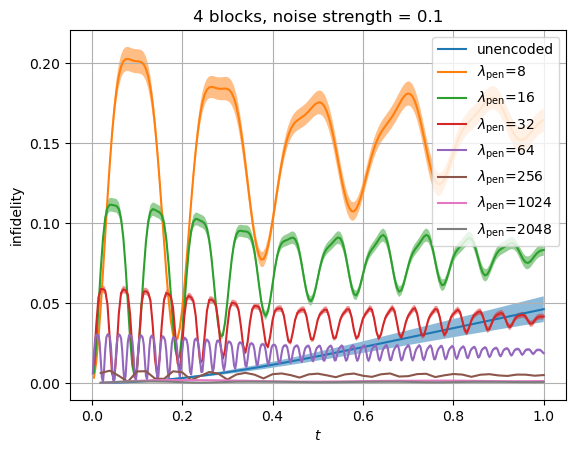

In [4]:
##### unencoded #####
data_t, data_seed, data_infidelity = [], [], []

f = open("sweep_time_unencoded_8qubits_noise=0.1.txt")
for line in f.readlines():
    line = line.strip().replace("#qubits =", "").replace("noise =", "").replace(
        "t =", "").replace("seed =", "").replace("innerprod =", "").replace(",", "")
    _, _, t, seed, innerprod = line.split()
    data_t.append(float(t))
    data_seed.append(int(seed))
    data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
f.close()

df = pd.DataFrame(data={
    "t": data_t,
    "seed": data_seed,
    "infidelity": data_infidelity
})

newdf = df.groupby("t")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
print("unencoded:")
print(newdf)
print("\n")
t_arr = newdf["t"].to_numpy()
mean_arr = newdf["mean"].to_numpy()
std_arr = newdf["std"].to_numpy()

# plt.errorbar(t_arr, mean_arr, yerr=std_arr,
#              label="unencoded",
#              fmt='o', markersize=3, zorder=2)
plt.plot(t_arr, mean_arr, label='unencoded')
plt.fill_between(t_arr, mean_arr + std_arr, mean_arr - std_arr, alpha = 0.5)

##### encoded #####
for lamb in [8, 16, 32, 64, 256, 1024, 2048]:
    data_t, data_seed, data_infidelity = [], [], []

    f = open(f"sweep_time_4blocks_noise=0.1_lamb={lamb}.txt")
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace(",", "")
        _, _, _, t, seed, innerprod = line.split()
        data_t.append(float(t))
        data_seed.append(int(seed))
        data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
    f.close()

    df = pd.DataFrame(data={
        "t": data_t,
        "seed": data_seed,
        "infidelity": data_infidelity
    })

    newdf = df.groupby("t")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print(f"encoded, lamb={lamb}:")
    print(newdf)
    print("\n")
    t_arr = newdf["t"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    # plt.errorbar(t_arr, mean_arr, yerr=std_arr,
    #              label=r"encoded, $\lambda_{\mathrm{pen}}$=" + f"{lamb}",
    #              fmt='o', markersize=3, zorder=2)
    plt.plot(t_arr, mean_arr, label=r"$\lambda_{\mathrm{pen}}$=" + f"{lamb}")
    plt.fill_between(t_arr, mean_arr + std_arr, mean_arr - std_arr, alpha = 0.5)

plt.xlabel(r"$t$")
plt.ylabel("infidelity")
# plt.yscale("log")
plt.title("4 blocks, noise strength = 0.1")
plt.legend()
# plt.legend(loc='upper left')
plt.grid()
plt.savefig("sweep_time_4blocks_noise=0.1.pdf", format="pdf", bbox_inches="tight")
plt.show()